<a href="https://colab.research.google.com/github/abdallahoismail/Classification/blob/main/Kaggle_competition_Spaceship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b0ab83f3e33f6ac0ad78b42893484313635640f42da97fc3fdfff3e1218d5ad1
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# defining custom functions
def missing_data(df):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = (df.isnull().sum()/df.isnull().count()*100).\
  sort_values(ascending = False)
  missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  return missing_data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

# File and Data Field Descriptions
## train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

### PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
### HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
### CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
### Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
### Destination - The planet the passenger will be debarking to.
### Age - The age of the passenger.
### VIP - Whether the passenger has paid for special VIP service during the voyage.
### RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
### Name - The first and last names of the passenger.
### Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

## sample_submission.csv - A submission file in the correct format.
### PassengerId - Id for each passenger in the test set.
### Transported - The target. For each passenger, predict either True or False.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
print(df.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [ ]:
missing_data(df)

Total   Percent
CryoSleep       217  2.496261
ShoppingMall    208  2.392730
VIP             203  2.335212
HomePlanet      201  2.312205
Name            200  2.300702
Cabin           199  2.289198
VRDeck          188  2.162660
FoodCourt       183  2.105142
Spa             183  2.105142
Destination     182  2.093639
RoomService     181  2.082135
Age             179  2.059128
PassengerId       0  0.000000
Transported       0  0.000000

# Things to Do before Modeling:
- Handling missing values
- preprocessing num and cat features
- Since this is a binary classification problem: might need to balance the training set if imbalanced (undersampling or oversampling)

# EDA

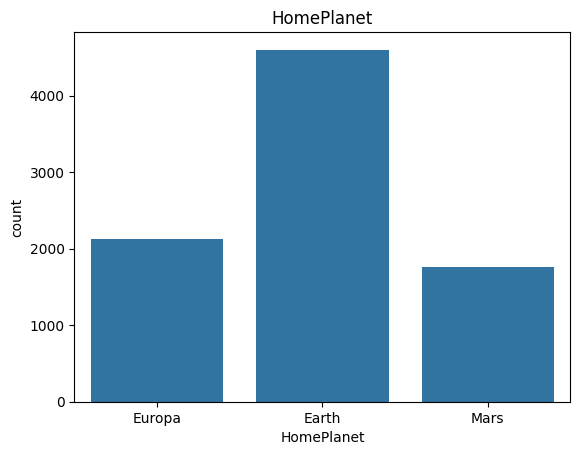

In [ ]:
# visualizing HomePlanet
sns.countplot(x='HomePlanet', data=df)
plt.title('HomePlanet')
plt.show()

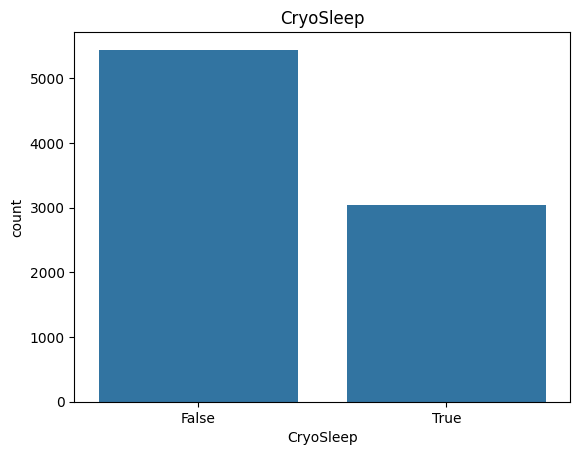

In [ ]:
# Visualizing Cryosleep
sns.countplot(x='CryoSleep', data=df)
plt.title('CryoSleep')
plt.show()

In [ ]:
df['CryoSleep'].isnull().sum()

217

In [ ]:
df['CryoSleep'].isnull().sum() / len(df['CryoSleep'])

0.02496261359714713

In [ ]:
# Cabin
len(df['Cabin'].unique())

6561

In [ ]:
# Destination Planet
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

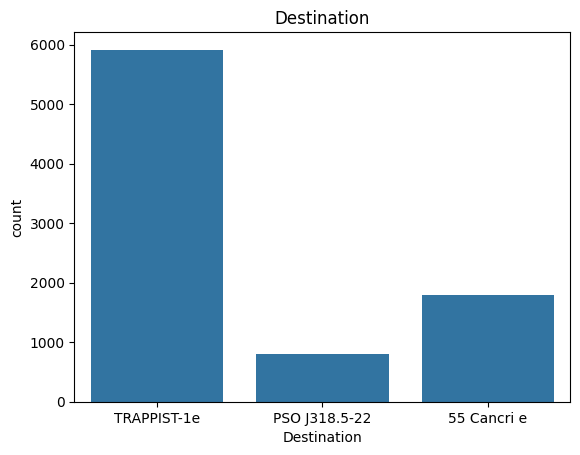

In [ ]:
sns.countplot(x='Destination', data=df)
plt.title('Destination')
plt.show()

In [ ]:
eda = ProfileReport(df)
eda

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Building the Data Preprocessing Pipeline

In [ ]:
cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(exclude='object').columns

In [ ]:
num_pipeline = Pipeline(steps=[('Imputation', SimpleImputer(strategy='median')),
                               ('scaling', StandardScaler())])
cat_pipeline = Pipeline(steps=[('Imputation', SimpleImputer(strategy='most_frequent')),
                            ('OneHotEncoding', OneHotEncoder())])

In [ ]:
preprocessor = ColumnTransformer(transformers=[('num_preproc', num_pipeline, num_features),
                                               ('cat_preproc', cat_pipeline, cat_features)])

In [ ]:
# cabin is an important variable to predict whehter one was transportedor not
# cabin: deck/num/side(P,S)
# extracting the deck and side from cabin and creating 2 new features

In [ ]:
df['Deck'] = df['Cabin'].str.split('/', expand=True)[0]

In [ ]:
df['Side'] = df['Cabin'].str.split('/', expand=True)[2]

In [ ]:
df['Deck'][8688], df['Deck'][8689]

('A', 'G')

In [ ]:
df['Side'][8688], df['Side'][8689]

('P', 'S')

In [ ]:
# another way
df['Cabin'].apply(lambda x: str(x).split('/') [2] if len(str(x).split('/')) > 1 else np.nan)

0       P
1       S
2       S
3       S
4       S
       ..
8688    P
8689    S
8690    S
8691    S
8692    S
Name: Cabin, Length: 8693, dtype: object

In [ ]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:
# version 1


def preprocess_data(df):
# Impute missing values in HomePlanet with 'Missing'
    df['HomePlanet'].fillna('Missing', inplace=True)
# highly correlated with target - drop NaNs after imputing other features
# extract the deck and side from Cabin
    df['Deck'] = df['Cabin'].str.split('/', expand=True)[0]
    df['Side'] = df['Cabin'].str.split('/', expand=True)[2]
# Destination
    df['Destination'].fillna('Missing', inplace=True)
# Age
    df['Age'].fillna(df['Age'].median())
# VIP - leave as is for now and drop na
# RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' impute NaNs to zero
# most values are zero
    df['RoomService'].fillna(0, inplace=True)
    df['FoodCourt'].fillna(0, inplace=True)
    df['ShoppingMall'].fillna(0, inplace=True)
    df['Spa'].fillna(0, inplace=True)
    df['VRDeck'].fillna(0, inplace=True)
# 'Name' and Cabin drop
    df.drop(columns=['Name', 'Cabin'], inplace=True)
# remove NaNs
    df.dropna(inplace=True)

In [ ]:
# version 2:
# after training and in testing phase: test set has nulls that we cannot dropna


def preprocess_data(df):
# cast all bool columns as str
    for col in df.select_dtypes(include=['bool']):
        df[col] = df[col].astype(str)
        df[col] = df[col].replace({'True': 'true', 'False': 'false'})  # Replace

# Impute missing values in HomePlanet with 'Missing'
    df['HomePlanet'].fillna('Missing', inplace=True)
# cryosleep: highly correlated with target - from previous version (drop NaNs after imputing other features)
# impute missing values with missing then returain the model
    df['CryoSleep'].fillna('Missing', inplace=True)
# extract the deck and side from Cabin
    df['Deck'] = df['Cabin'].str.split('/', expand=True)[0]
    df['Side'] = df['Cabin'].str.split('/', expand=True)[2]
    df['Deck'].fillna('Missing', inplace=True)
    df['Side'].fillna('Missing', inplace=True)
# Destination
    df['Destination'].fillna('Missing', inplace=True)
# Age
    df['Age'].fillna(df['Age'].median(), inplace=True)
# VIP - X(leave as is for now and drop na)X
# VIP - impute missing values with missing then returain the model
    df['VIP'].fillna('Missing', inplace=True)
# RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' impute NaNs to zero
# most values are zero
    df['RoomService'].fillna(0, inplace=True)
    df['FoodCourt'].fillna(0, inplace=True)
    df['ShoppingMall'].fillna(0, inplace=True)
    df['Spa'].fillna(0, inplace=True)
    df['VRDeck'].fillna(0, inplace=True)
# 'Name' and Cabin drop
    df.drop(columns=['Name', 'Cabin'], inplace=True)
# remove NaNs
    # df.dropna(inplace=True)

In [ ]:
# version 3

def preprocess_data(df):
    # Cast all boolean columns to string consistently, including CryoSleep and VIP
    for col in df.select_dtypes(include=['bool']).columns:
        df[col] = df[col].astype(str)

    # Ensure CryoSleep and VIP are explicitly handled as strings
    df['CryoSleep'] = df['CryoSleep'].replace({True: 'true', False: 'false', None: 'Missing'})
    df['CryoSleep'].fillna('Missing', inplace=True)
    df['CryoSleep'] = df['CryoSleep'].astype(str)

    df['VIP'] = df['VIP'].replace({True: 'true', False: 'false', None: 'Missing'})
    df['VIP'].fillna('Missing', inplace=True)
    df['VIP'] = df['VIP'].astype(str)

    # Impute missing values in HomePlanet with 'Missing'
    df['HomePlanet'].fillna('Missing', inplace=True)

    # Extract the deck and side from Cabin
    df['Deck'] = df['Cabin'].str.split('/', expand=True)[0]
    df['Side'] = df['Cabin'].str.split('/', expand=True)[2]
    df['Deck'].fillna('Missing', inplace=True)
    df['Side'].fillna('Missing', inplace=True)

    # Destination: Fill missing values with 'Missing'
    df['Destination'].fillna('Missing', inplace=True)

    # Age: Fill missing values with the median
    df['Age'].fillna(df['Age'].median(), inplace=True)

    # RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: Impute NaNs with 0
    for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
        df[col].fillna(0, inplace=True)

    # Drop 'Name' and 'Cabin' columns
    df.drop(columns=['Name', 'Cabin'], inplace=True)

    return df

In [ ]:
abt = df.copy()
preprocess_data(abt)

PassengerId HomePlanet CryoSleep    Destination   Age    VIP  \
0        0001_01     Europa     false    TRAPPIST-1e  39.0  false   
1        0002_01      Earth     false    TRAPPIST-1e  24.0  false   
2        0003_01     Europa     false    TRAPPIST-1e  58.0   true   
3        0003_02     Europa     false    TRAPPIST-1e  33.0  false   
4        0004_01      Earth     false    TRAPPIST-1e  16.0  false   
...          ...        ...       ...            ...   ...    ...   
8688     9276_01     Europa     false    55 Cancri e  41.0   true   
8689     9278_01      Earth      true  PSO J318.5-22  18.0  false   
8690     9279_01      Earth     false    TRAPPIST-1e  26.0  false   
8691     9280_01     Europa     false    55 Cancri e  32.0  false   
8692     9280_02     Europa     false    TRAPPIST-1e  44.0  false   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck Transported Deck  \
0             0.0        0.0           0.0     0.0     0.0       False    B   
1           109.0        9.0          25.0   549.0    44.0        True    F   
2            43.0     3576.0           0.0  6715.0    49.0       False    A   
3             0.0     1283.0         371.0  3329.0   193.0       False    A   
4           303.0       70.0         151.0   565.0     2.0        True    F   
...           ...        ...           ...     ...     ...         ...  ...   
8688          0.0     6819.0           0.0  1643.0    74.0       False    A   
8689          0.0        0.0           0.0     0.0     0.0       False    G   
8690          0.0        0.0        1872.0     1.0     0.0        True    G   
8691          0.0     1049.0           0.0   353.0  3235.0       False    E   
8692        126.0     4688.0           0.0     0.0    12.0        True    E   

     Side  
0       P  
1       S  
2       S  
3       S  
4       S  
...   ...  
8688    P  
8689    S  
8690    S  
8691    S  
8692    S  

[8693 rows x 14 columns]

In [ ]:
abt.head()

PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa     false  TRAPPIST-1e  39.0  false          0.0   
1     0002_01      Earth     false  TRAPPIST-1e  24.0  false        109.0   
2     0003_01     Europa     false  TRAPPIST-1e  58.0   true         43.0   
3     0003_02     Europa     false  TRAPPIST-1e  33.0  false          0.0   
4     0004_01      Earth     false  TRAPPIST-1e  16.0  false        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck Transported Deck Side  
0        0.0           0.0     0.0     0.0       False    B    P  
1        9.0          25.0   549.0    44.0        True    F    S  
2     3576.0           0.0  6715.0    49.0       False    A    S  
3     1283.0         371.0  3329.0   193.0       False    A    S  
4       70.0         151.0   565.0     2.0        True    F    S

In [ ]:
abt.CryoSleep.dtypes

dtype('O')

In [ ]:
abt.VIP.dtypes

dtype('O')

In [ ]:
abt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   object 
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   object 
 12  Deck          8693 non-null   object 
 13  Side          8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 950.9+ KB


In [ ]:
print(abt.isnull().sum())

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Side            0
dtype: int64


# Modeling
- Features and Target - X, Y
- Balance set
- One hot encoding
- Feature scaling
- Train, Holdout split
- test a bunch of models

In [ ]:
X = abt.drop(columns=['Transported', 'PassengerId'])
y = abt['Transported']

In [ ]:
y.value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [ ]:
# cast y as boolean True and False
y2 = y.apply(lambda x: True if x == 'True' else False)

In [ ]:
y2.value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [ ]:
y2.dtype

dtype('bool')

In [ ]:
X.head()

HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     false  TRAPPIST-1e  39.0  false          0.0        0.0   
1      Earth     false  TRAPPIST-1e  24.0  false        109.0        9.0   
2     Europa     false  TRAPPIST-1e  58.0   true         43.0     3576.0   
3     Europa     false  TRAPPIST-1e  33.0  false          0.0     1283.0   
4      Earth     false  TRAPPIST-1e  16.0  false        303.0       70.0   

   ShoppingMall     Spa  VRDeck Deck Side  
0           0.0     0.0     0.0    B    P  
1          25.0   549.0    44.0    F    S  
2           0.0  6715.0    49.0    A    S  
3         371.0  3329.0   193.0    A    S  
4         151.0   565.0     2.0    F    S

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y2, test_size=0.2, stratify=y, random_state=42)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((6954, 12), (1739, 12), (6954,), (1739,))

In [ ]:
X_train.head()

HomePlanet CryoSleep    Destination   Age    VIP  RoomService  FoodCourt  \
3600      Earth     false    TRAPPIST-1e   0.0  false          0.0        0.0   
1262      Earth      true    TRAPPIST-1e  17.0  false          0.0        0.0   
8612      Earth   Missing  PSO J318.5-22  35.0  false          0.0        0.0   
5075     Europa      true    55 Cancri e  26.0  false          0.0        0.0   
4758      Earth     false    TRAPPIST-1e  13.0  false          0.0        0.0   

      ShoppingMall  Spa  VRDeck Deck Side  
3600           0.0  0.0     0.0    G    S  
1262           0.0  0.0     0.0    G    S  
8612           0.0  0.0     0.0    G    S  
5075           0.0  0.0     0.0    D    S  
4758          60.0  1.0  5147.0    G    P

In [ ]:
y_train.head()

3600     True
1262     True
8612    False
5075     True
4758    False
Name: Transported, dtype: bool

In [ ]:
cat_features = X_train.select_dtypes(include='object').columns
num_features = X_train.select_dtypes(exclude='object').columns

In [ ]:
cat_features, num_features

(Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side'], dtype='object'),
 Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object'))

In [ ]:
num_pipeline = Pipeline(steps=[('scaling', StandardScaler())])
cat_pipeline = Pipeline(steps=[('OneHotEncoding', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
preprocessor = ColumnTransformer(transformers=[('num_preproc', num_pipeline, num_features),
                                               ('cat_preproc', cat_pipeline, cat_features)])

In [ ]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val) # Do NOT fit on validation set: only Transform. This is to avoid data leakage

In [ ]:
X_train_preprocessed.shape, X_val_preprocessed.shape

((6954, 32), (1739, 32))

# Setting Up an ML Pipeline

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV

In [ ]:
ml_pipeline = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'ridge': RidgeClassifier(),
    'SVM': SVC(kernel='rbf'),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
              }

In [ ]:
grid = {
    'RandomForest': {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]},
    'LogisticRegression': {'C': [0.0001, 0.001, 0.01]},
    'ridge': {'alpha': [0.0001, 0.001, 0.01]},
    'SVM': {'C': [0.0001, 0.001, 0.01]},
    'KNN': {'n_neighbors': [3, 5, 7, 10]},
    'DecisionTree': {'max_depth': [10, 20, 40]},
    'GradientBoosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth' : [10, 20, 30]}
    }

In [ ]:
ml_pipeline.items()

dict_items([('RandomForest', RandomForestClassifier()), ('LogisticRegression', LogisticRegression()), ('ridge', RidgeClassifier()), ('SVM', SVC()), ('KNN', KNeighborsClassifier()), ('DecisionTree', DecisionTreeClassifier()), ('GradientBoosting', GradientBoostingClassifier())])

In [ ]:
fit_models = {}

for name, model in ml_pipeline.items():
    ml_model = GridSearchCV(model, grid[name], cv=5, n_jobs=-1)
    ml_model.fit(X_train_preprocessed, y_train)
    fit_models[name] = ml_model
    print(f'Model: {name}, Best Score: {ml_model.best_score_}')

Model: RandomForest, Best Score: 0.8052050473186119
Model: LogisticRegression, Best Score: 0.7899053627760252
Model: ridge, Best Score: 0.7692429022082019
Model: SVM, Best Score: 0.7419558359621451
Model: KNN, Best Score: 0.7881703470031546
Model: DecisionTree, Best Score: 0.7809148264984227
Model: GradientBoosting, Best Score: 0.795583596214511
Model: RandomForest, Best Score: 0.805678233438486
Model: LogisticRegression, Best Score: 0.7899053627760252
Model: ridge, Best Score: 0.7692429022082019
Model: SVM, Best Score: 0.7419558359621451
Model: KNN, Best Score: 0.7881703470031546
Model: DecisionTree, Best Score: 0.7809148264984228
Model: GradientBoosting, Best Score: 0.796845425867508
Model: RandomForest, Best Score: 0.8050473186119873
Model: LogisticRegression, Best Score: 0.7899053627760252
Model: ridge, Best Score: 0.7692429022082019
Model: SVM, Best Score: 0.7419558359621451
Model: KNN, Best Score: 0.7881703470031546
Model: DecisionTree, Best Score: 0.7812302839116719


KeyboardInterrupt: 

In [ ]:
ml_pipeline = {
    'RandomForest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'GradientBoosting': GradientBoostingClassifier()
              }

grid = {
    'RandomForest': {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]},
    'KNN': {'n_neighbors': [3, 5, 7, 10]},
    'GradientBoosting': {'n_estimators': [100, 200, 300]}
    }

fit_models = {}

for name, model in ml_pipeline.items():
    print(f'Training the {name} Model')
    ml_model = GridSearchCV(model, grid[name], cv=5, n_jobs=-1)
    ml_model.fit(X_train_preprocessed, y_train)
    fit_models[name] = ml_model
    print(f'Model: {name}, Best Score: {ml_model.best_score_}')

Training the RandomForest Model
Model: RandomForest, Best Score: 0.7963782590031497
Training the KNN Model
Model: KNN, Best Score: 0.7847294788180957
Training the GradientBoosting Model
Model: GradientBoosting, Best Score: 0.8001163698803717


In [ ]:
for name, model in fit_models.items():
    print(model.best_params_)

{'max_depth': 10, 'n_estimators': 300}
{'n_neighbors': 10}
{'n_estimators': 100}


In [ ]:
# get best hyperparameters for each model
for name, model in fit_models.items():
    print(f'Model: {name}, Best Hyperparameters: {model.best_params_}')

Model: RandomForest, Best Hyperparameters: {'max_depth': 10, 'n_estimators': 300}
Model: KNN, Best Hyperparameters: {'n_neighbors': 10}
Model: GradientBoosting, Best Hyperparameters: {'n_estimators': 100}


In [ ]:
# evaluate the performance on the validation set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for name, model in fit_models.items():
    yhat = model.predict(X_val_preprocessed)
    accuracy = accuracy_score(y_val, yhat)
    precision = precision_score(y_val, yhat)
    recall = recall_score(y_val, yhat)
    f1 = f1_score(y_val, yhat)
    print(f'For the {name} Model, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

For the RandomForest Model, Accuracy: 0.79700977573318, Precision: 0.8072855464159812, Recall: 0.7842465753424658, F1 Score: 0.7955993051534452
For the KNN Model, Accuracy: 0.7883841288096607, Precision: 0.8307291666666666, Recall: 0.728310502283105, F1 Score: 0.7761557177615572
For the GradientBoosting Model, Accuracy: 0.8056354226566993, Precision: 0.7880085653104925, Recall: 0.8401826484018264, F1 Score: 0.8132596685082873


In [ ]:
fit_models

{'RandomForest': GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
              param_grid={'max_depth': [10, 20, 30],
                          'n_estimators': [100, 200, 300]}),
 'KNN': GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
              param_grid={'n_neighbors': [3, 5, 7, 10]}),
 'GradientBoosting': GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
              param_grid={'n_estimators': [100, 200, 300]})}

# Saving the Best Model

In [ ]:
import pickle

In [ ]:
# save the model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(fit_models['GradientBoosting'], f)

In [ ]:
# reload the model
with open('best_model.pkl', 'rb') as f:
    reloaded_model = pickle.load(f)

In [ ]:
reloaded_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 300]})

# Making a submission entry

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
test_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

In [ ]:
test_abt = test_df.copy()

In [ ]:
print(test_abt.isnull().sum())

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [ ]:
preprocess_data(test_abt)

PassengerId HomePlanet CryoSleep    Destination   Age    VIP  \
0        0013_01      Earth      true    TRAPPIST-1e  27.0  false   
1        0018_01      Earth     false    TRAPPIST-1e  19.0  false   
2        0019_01     Europa      true    55 Cancri e  31.0  false   
3        0021_01     Europa     false    TRAPPIST-1e  38.0  false   
4        0023_01      Earth     false    TRAPPIST-1e  20.0  false   
...          ...        ...       ...            ...   ...    ...   
4272     9266_02      Earth      true    TRAPPIST-1e  34.0  false   
4273     9269_01      Earth     false    TRAPPIST-1e  42.0  false   
4274     9271_01       Mars      true    55 Cancri e  26.0  false   
4275     9273_01     Europa     false        Missing  26.0  false   
4276     9277_01      Earth      true  PSO J318.5-22  43.0  false   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck     Deck     Side  
0             0.0        0.0           0.0     0.0     0.0        G        S  
1             0.0        9.0           0.0  2823.0     0.0        F        S  
2             0.0        0.0           0.0     0.0     0.0        C        S  
3             0.0     6652.0           0.0   181.0   585.0        C        S  
4            10.0        0.0         635.0     0.0     0.0        F        S  
...           ...        ...           ...     ...     ...      ...      ...  
4272          0.0        0.0           0.0     0.0     0.0        G        S  
4273          0.0      847.0          17.0    10.0   144.0  Missing  Missing  
4274          0.0        0.0           0.0     0.0     0.0        D        P  
4275          0.0     2680.0           0.0     0.0   523.0        D        P  
4276          0.0        0.0           0.0     0.0     0.0        G        S  

[4277 rows x 13 columns]

In [ ]:
test_abt.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Side            0
dtype: int64

In [ ]:
test_abt.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck',
       'Side'],
      dtype='object')

In [ ]:
test_abt_preproc = preprocessor.transform(test_abt) # Do NOT fit on validation set: only Transform

In [ ]:
yhat_test = fit_models['GradientBoosting'].predict(test_abt_preproc)

In [ ]:
yhat_test

array([ True, False,  True, ...,  True,  True,  True])

In [ ]:
submission = pd.DataFrame({'PassengerId': test_abt['PassengerId'], 'Transported': yhat_test})
submission

PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]

In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
from re import sub
submission2 = pd.DataFrame([test_abt['PassengerId'], yhat_test]).T
submission2.columns = ['PassengerID', 'Transported']
submission2

PassengerID Transported
0        0013_01        True
1        0018_01       False
2        0019_01        True
3        0021_01        True
4        0023_01        True
...          ...         ...
4272     9266_02        True
4273     9269_01       False
4274     9271_01        True
4275     9273_01        True
4276     9277_01        True

[4277 rows x 2 columns]

In [ ]:
submission2['Transported'].value_counts()

Transported
True     2294
False    1983
Name: count, dtype: int64